# Notebook Para Practicar



##Carga De Datos Y Librerias

In [34]:
from google.colab import userdata
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
from google.colab import drive
drive.mount('/content/drive')

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')


Mounted at /content/drive


In [4]:
!kaggle datasets download -d shrishtimanja/ecommerce-dataset-for-data-analysis

! unzip "ecommerce-dataset-for-data-analysis.zip"


Dataset URL: https://www.kaggle.com/datasets/shrishtimanja/ecommerce-dataset-for-data-analysis
License(s): other
  0% 0.00/1.93M [00:00<?, ?B/s]
100% 1.93M/1.93M [00:00<00:00, 59.5MB/s]
Archive:  ecommerce-dataset-for-data-analysis.zip
  inflating: project1_df.csv         


## Contexto de los datos

Acerca del conjunto de datos

Este conjunto de datos contiene 55 000 entradas de transacciones sintéticas de clientes, generadas con la biblioteca Faker de Python. El objetivo de la creación de este conjunto de datos fue proporcionar un recurso para que los estudiantes como yo exploren, analicen y apliquen diversas técnicas de análisis de datos en un contexto que imita de cerca los datos del mundo real.

Acerca del conjunto de datos:

* CID (ID de cliente): un identificador único para cada cliente.
* TID (ID de transacción): un identificador único para cada transacción.
* Género: el género del cliente, categorizado como masculino o femenino.
* Grupo de edad: grupo de edad del cliente, dividido en varios rangos.
* Fecha de compra: la marca de tiempo en la que se realizó la transacción.
* Categoría del producto: la categoría del producto comprado, como productos electrónicos, ropa, etc.
* Descuento aplicado: indica si el cliente aprovechó algún descuento (Sí/No).
* Nombre del descuento: nombre del descuento aplicado (p. ej., FESTIVE50).
* Monto del descuento (INR): el monto del descuento aplicado por el cliente.
* Importe bruto: el importe total antes de aplicar cualquier descuento.
* Importe neto: el importe final después de aplicar el descuento.
* Método de compra: el método de pago utilizado (p. ej., tarjeta de crédito, tarjeta de débito, etc.).
* Ubicación: la ciudad donde se realizó la compra.

## Análisis exploratorio de datos

### Exploracion General

In [15]:
# Reemplaza 'ecommerce.csv' con el nombre real de tu archivo CSV
df = pd.read_csv('/content/project1_df.csv') # ,index_col='TID' Se deja el indice con el campo unico de transaccion, puede ser optimizado en algunos casos

# Muestra los primeros 20 registros
df.head()


,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CID                    55000 non-null  int64  
 1   TID                    55000 non-null  int64  
 2   Gender                 55000 non-null  object 
 3   Age Group              55000 non-null  object 
 4   Purchase Date          55000 non-null  object 
 5   Product Category       55000 non-null  object 
 6   Discount Availed       55000 non-null  object 
 7   Discount Name          27415 non-null  object 
 8   Discount Amount (INR)  55000 non-null  float64
 9   Gross Amount           55000 non-null  float64
 10  Net Amount             55000 non-null  float64
 11  Purchase Method        55000 non-null  object 
 12  Location               55000 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 5.5+ MB


In [7]:
df.describe()

,CID,TID,Discount Amount (INR),Gross Amount,Net Amount
count,55000.000000,5.500000e+04,55000.000000,55000.000000,55000.000000
mean,551245.593891,5.504740e+09,136.986796,3012.936606,2875.949810
std,260603.330337,2.594534e+09,165.375502,1718.431066,1726.127778
min,100009.000000,1.000163e+09,0.000000,136.454325,-351.119775
25%,323717.000000,3.252604e+09,0.000000,1562.111325,1429.551863
50%,550088.500000,5.498383e+09,0.000000,2954.266150,2814.910875
75%,776955.750000,7.747933e+09,274.115000,4342.221675,4211.407838
max,999996.000000,9.999393e+09,500.000000,8394.825600,8394.825600


In [8]:
df.memory_usage(deep='True')

,0
Index,128
CID,440000
TID,440000
Gender,3410358
Age Group,3437101
Purchase Date,4180000
Product Category,3768417
Discount Availed,3272415
Discount Name,2709160
Discount Amount (INR),440000


### Uso ILOC Y LOC

Permiten filtrar datos de manera mas específica. Loc filtra segun un label mientras que iloc lo hace mediante indices.

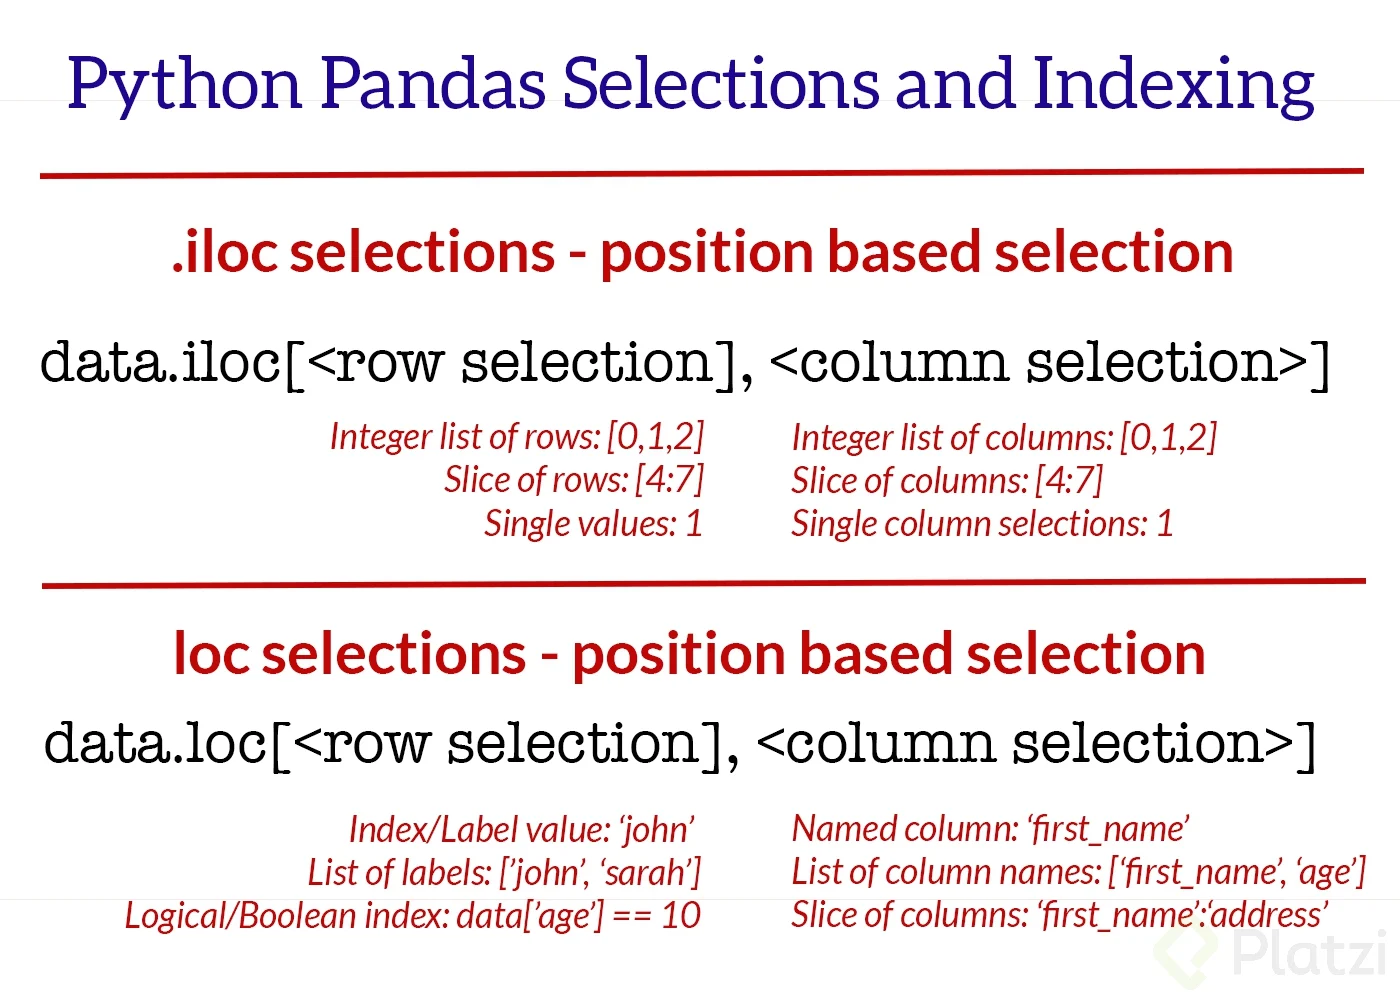

Ejemplo del uso de LOC para filtrar los null de cualquier columna

In [9]:
df.loc[df.isna().any(axis="columns")].head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.0,5695.61265,5695.61265,Debit Card,Delhi
6,668787,9460023916,Male,25-45,08/10/2023 16:59:52,Electronics,No,NaN,0.0,5593.93560,5593.93560,PhonePe UPI,Delhi
7,933551,6877673032,Female,18-25,14/12/2022 20:13:45,Electronics,No,NaN,0.0,1901.79640,1901.79640,Credit Card,Delhi
8,414167,2841266620,Male,18-25,29/04/2020 09:10:46,Pet Care,No,NaN,0.0,3961.67100,3961.67100,Debit Card,Delhi
10,931578,5168806107,Other,25-45,09/12/2022 19:54:47,Clothing,No,NaN,0.0,7824.16530,7824.16530,Credit Card,Other


Ejemplo de iloc, filtro columnas

In [10]:
df.iloc[:, 0:3].head()

,CID,TID,Gender
0,943146,5876328741,Female
1,180079,1018503182,Male
2,337580,3814082218,Other
3,180333,1395204173,Other
4,447553,8009390577,Male


In [11]:
df.loc[:,['Gender']].head()

,Gender
0,Female
1,Male
2,Other
3,Other
4,Male


### Uso Apply Y Lambda
En este caso aplicare funciones lambda sobre un sub conjunto de datos en donde si se cumple la condicion Gender el monto se divide en 100 en caso contratio lo deja igual

In [16]:
df.loc[0:10,['Gender','Net Amount']].apply(lambda x : x['Net Amount']/100 if x['Gender']=='Female' else x['Net Amount'], axis=1)


,0
0,6.610040
1,4463.801875
2,1774.832575
3,5695.612650
4,1852.731500
5,3522.387400
6,5593.935600
7,19.017964
8,3961.671000
9,1059.850400


### Uso De Group By

In [17]:
df.groupby(by=['Product Category','Gender'])['TID'].count().head()


Product Category   Gender
Beauty and Health  Female    2811
                   Male      2803
                   Other     2718
Books              Female     889
                   Male       949
Name: TID, dtype: int64

### Uso Graficos

#### Barra

Grafico de barra donde muestra la distribucion por genero, son 3 categorias que contienen una cantidad similar de transacciones

In [80]:
dx=df.groupby('Gender')['TID'].count().reset_index(name = 'Sizes')

# to plot the size of group using Plotly
fig = px.bar(dx, x='Gender',y='Sizes'
              , title = 'Transacciones Por Genero'
              , labels = {'Sizes':'Transacciones',
                          'Gender':'Genero'}
              , width = 500, height = 350,color="Gender")
fig.show() # to show the result

dx=df.groupby('Product Category')['TID'].count().reset_index(name = 'Sizes')

# to plot the size of group using Plotly
fig = px.bar(dx, x='Product Category',y='Sizes'
              , title = 'Transacciones Por Genero'
              , labels = {'Sizes':'Transacciones',
                          'Product Category':'Categoria De Productos'}
              , width = 500, height = 350,color="Product Category")
fig.show() # to show the result



#### Icicle Charts


In [86]:
dx=df.groupby(by=['Product Category','Gender'])['TID'].count().reset_index(name = 'Sizes')
fig = px.icicle(dx, path=[px.Constant("all"), 'Gender', 'Product Category'],
                values='Sizes', color='Gender')
fig.update_layout(margin = dict(t=25, l=15, r=15, b=15))
fig.show()

#### Dot Plot

In [93]:
dx=df.groupby(by=['Product Category','Gender'])['Gross Amount'].sum().reset_index(name = 'Importe bruto')


In [94]:
dx=df.groupby(by=['Product Category','Gender'])['Gross Amount'].sum().reset_index(name = 'Importe bruto')

fig = px.scatter(dx, y="Product Category", x="Importe bruto", color="Gender", symbol="Gender")
fig.update_traces(marker_size=10)
fig.show()